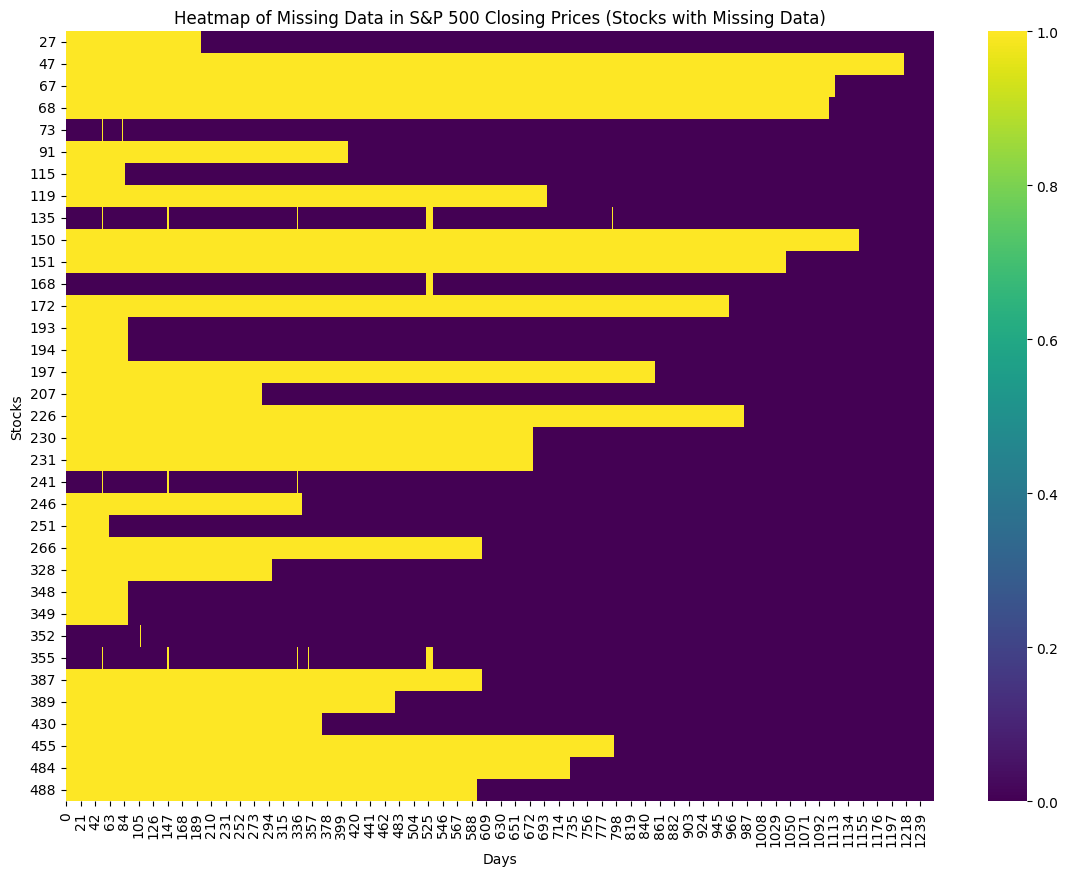

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/sp500_closing_prices.csv', header=None)

# Create a mask for missing data
missing_data = df.isnull()

# Filter to keep only the rows (stocks) that have missing data
stocks_with_missing_data = missing_data[missing_data.any(axis=1)]

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot the heatmap
sns.heatmap(stocks_with_missing_data, cbar=True, cmap='viridis', yticklabels=True)

# Labeling the plot
plt.title('Heatmap of Missing Data in S&P 500 Closing Prices (Stocks with Missing Data)')
plt.xlabel('Days')
plt.ylabel('Stocks')

# Display the plot
plt.show()


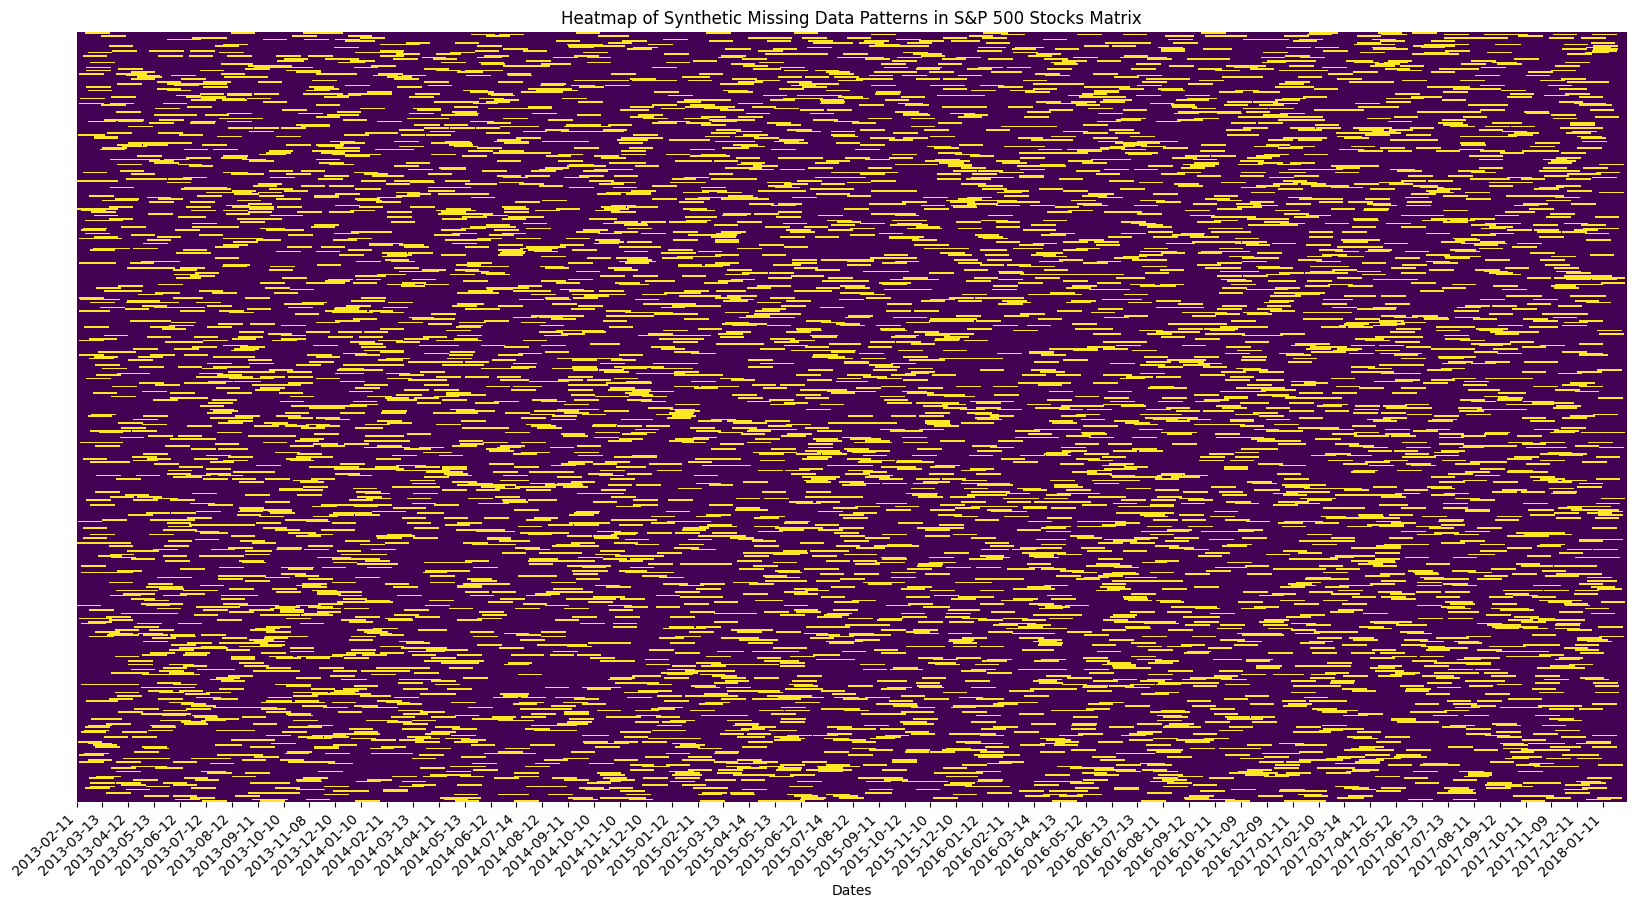

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the first dataset (with missing values)
file_path_missing = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/rPSMF/ExperimentImpute/data/cleaned_sp500_stocks_matrix_masked_20percent.csv'
matrix_df_missing = pd.read_csv(file_path_missing, index_col=0)

# Load the second dataset (with dates)
file_path_dates = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/code test/sp500_stocks_matrix_original.csv'
matrix_df_dates = pd.read_csv(file_path_dates, index_col=0)

# Extract the dates from the first row of the dataset with dates
dates = matrix_df_dates.columns[1:]  # Assuming the first column is the stock ticker

# Filter to show only the rows (stocks) that have missing values
rows_with_missing = matrix_df_missing[matrix_df_missing.isna().any(axis=1)]

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(rows_with_missing.isna(), cbar=False, cmap='viridis', yticklabels=False)  # yticklabels=False hides the y-axis labels

# Ensure the number of ticks matches the number of date labels
num_dates = len(dates)
tick_spacing = 21  # Adjust this number to show ticks at a specific interval, for example, every month for 21 trading days
plt.xticks(ticks=range(0, num_dates, tick_spacing), labels=dates[::tick_spacing], rotation=45, ha='right')

# Customizing the plot
plt.title('Heatmap of Synthetic Missing Data Patterns in S&P 500 Stocks Matrix')
plt.xlabel('Dates')
plt.ylabel('')  # Leave the y-axis label empty
plt.show()


In [10]:
import pandas as pd

# Load the dataset
file_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/code test/sp500_stocks_matrix_original.csv'  # Replace with the correct file path
matrix_df = pd.read_csv(file_path, index_col=0)

# Check for the missing dates for the stock ORCL
orcl_missing_dates = matrix_df.loc['DHR'].isna()
missing_dates_orcl = orcl_missing_dates[orcl_missing_dates].index.tolist()

print("Dates with missing data for ORCL:", missing_dates_orcl)


Dates with missing data for ORCL: ['2013-04-26', '2013-09-09', '2013-09-10', '2013-09-11', '2014-06-10', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2016-04-04']


In [19]:
import pandas as pd

# Load the dataset
file_path = '/Users/guillermodominguez/Documents/Imperial College London/Dissertation/code test/sp500_stocks_matrix_original.csv'  # Replace with the correct file path
matrix_df = pd.read_csv(file_path, index_col=0)

# Remove all rows (stocks) that have any NaN entries
cleaned_df = matrix_df.dropna()

# Check the shape of the cleaned dataset
cleaned_shape = cleaned_df.shape
print(f"Shape of the cleaned dataset: {cleaned_shape}")

# Save the cleaned dataset to a new file
cleaned_file_path = 'cleaned_sp500_stocks_matrix.csv'  # Replace with your desired save path
cleaned_df.to_csv(cleaned_file_path)

print(f"Cleaned dataset saved to: {cleaned_file_path}")
cleaned_df

Shape of the cleaned dataset: (470, 1259)
Cleaned dataset saved to: cleaned_sp500_stocks_matrix.csv


,2013-02-08,2013-02-11,2013-02-12,2013-02-13,2013-02-14,2013-02-15,2013-02-19,2013-02-20,2013-02-21,2013-02-22,...,2018-01-25,2018-01-26,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-05,2018-02-06,2018-02-07
Name,,,,,,,,,,,,,,,,,,,,,
A,45.0800,44.6000,44.6200,44.7500,44.5800,42.2500,43.0100,42.2400,41.6300,41.8000,...,73.86,74.82,74.53,72.99,73.43,72.83,71.25,68.22,68.45,68.06
AAL,14.7500,14.4600,14.2700,14.6600,13.9900,14.5000,14.2600,13.3300,13.3700,13.5700,...,53.05,53.07,52.68,52.59,54.32,53.88,52.10,49.76,51.18,51.40
AAP,78.9000,78.3900,78.6000,78.9700,78.8400,79.0000,80.7200,79.5000,79.0600,79.2100,...,120.92,123.64,122.89,119.27,116.99,117.29,113.93,109.86,112.20,109.93
AAPL,67.8542,68.5614,66.8428,66.7156,66.6556,65.7371,65.7128,64.1214,63.7228,64.4014,...,171.11,171.51,167.96,166.97,167.43,167.78,160.50,156.49,163.03,159.54
ABBV,36.2500,35.8500,35.4200,35.2700,36.5700,37.5800,38.1900,38.6100,38.7800,38.4600,...,108.30,123.21,122.31,115.88,112.22,116.34,115.17,109.51,111.20,113.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,27.0900,27.4600,27.9500,28.2600,28.4700,28.2800,28.7600,27.9600,27.6800,27.7900,...,73.24,74.41,73.41,73.07,72.26,74.84,75.66,72.66,71.33,71.79
YUM,65.3000,64.5500,64.7500,64.4100,63.8900,63.9900,65.1500,64.5600,65.0500,65.4500,...,85.66,86.20,86.48,84.59,84.59,83.98,82.63,79.80,80.58,80.13
ZBH,75.8500,75.6500,75.4400,76.0000,76.3400,75.9000,76.1100,75.3100,73.8700,74.1400,...,124.74,126.23,127.39,125.94,127.12,128.19,125.79,123.18,122.30,120.78
